<a href="https://colab.research.google.com/github/AliAch04/Python-Data-Science-Labs/blob/main/TP3_Ali_ACHENAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP : Nettoyage et Préparation du Dataset Titanic

### **Étape 1 : Exploration du Dataset**

In [38]:
# Import des bibliotheques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Charger le fichier CSV
df = pd.read_csv('/content/titanic.csv')

In [40]:
# Afficher les premières lignes
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [41]:
# Examiner les types de variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
#  Identifier les colonnes avec valeurs manquantes
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### **Étape 2 : Analyse et gestion des valeurs manquantes**

In [43]:
# Imputation pour Age
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)

# Imputation pour Embarked (Données catégorielles)
mode =  df['Embarked'].mode()[0]
df['Embarked'].fillna(mode, inplace=True)

/tmp/ipython-input-2106072254.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median, inplace=True)
/tmp/ipython-input-2106072254.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [44]:
# Vérification finale des manquants
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


### **Étape 3 : Nettoyage et transformation des variables**

In [45]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [46]:
# Convertir la variable Sex en format numérique
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Traiter la colonne Embarked.
df = pd.get_dummies(df, columns=['Embarked'])

# Préparer les catégories pour ML (Pclass est deja numérique)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    bool   
 12  Embarked_Q   891 non-null    bool   
 13  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(6), object(3)
memory usage: 79.3+ KB
None


### **Étape 4 - Création de nouvelles variables (Feature Engineering)**

In [47]:
# Créer FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [48]:
### Extraction du titre depuis Name

# Extraction du titre depuis Name en utilisant une expression régulière
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Mapper les titres moins courants à 'Rare'
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [49]:
# Aperçu
print(df[['Name', 'Title', 'FamilySize']].head(10))

                                                Name   Title  FamilySize
0                            Braund, Mr. Owen Harris      Mr           2
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs           2
2                             Heikkinen, Miss. Laina    Miss           1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs           2
4                           Allen, Mr. William Henry      Mr           1
5                                   Moran, Mr. James      Mr           1
6                            McCarthy, Mr. Timothy J      Mr           1
7                     Palsson, Master. Gosta Leonard  Master           5
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs           3
9                Nasser, Mrs. Nicholas (Adele Achem)     Mrs           2


### **Étape 5 - Suppression des colonnes inutiles**

In [50]:
# Colonnes candidates : Ticket, Cabin, Name
df.drop(columns=['Ticket', 'Cabin', 'Name', 'PassengerId'], inplace=True)

# Aperçu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
 10  FamilySize  891 non-null    int64  
 11  Title       891 non-null    object 
dtypes: bool(3), float64(2), int64(6), object(1)
memory usage: 65.4+ KB
None


### **Étape 6 : Détection simple des valeurs aberrantes**

In [51]:
df[['Fare', 'Age']].describe()

,Fare,Age
count,891.000000,891.000000
mean,32.204208,29.361582
std,49.693429,13.019697
min,0.000000,0.420000
25%,7.910400,22.000000
50%,14.454200,28.000000
75%,31.000000,35.000000
max,512.329200,80.000000


(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <BarContainer object of 10 artists>)

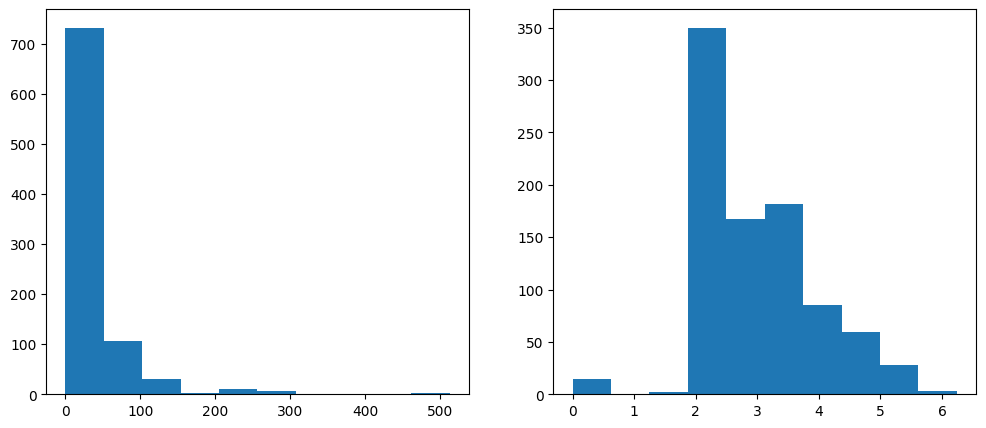

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].hist(df['Fare'], bins=10)

# Transformation log pour Fare (asymétrique)
df['Fare_log'] = np.log1p(df['Fare'])
axes[1].hist(df['Fare_log'], bins=10)

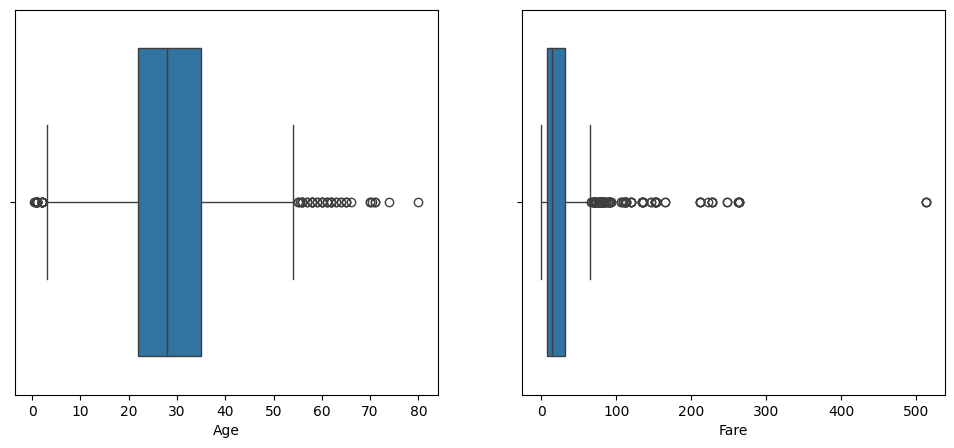

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Transformation log pour Fare (asymétrique)
df['Fare_log'] = np.log1p(df['Fare'])

# Boxplot pour visualiser outliers
sns.boxplot(x=df['Age'], ax=axes[0])
sns.boxplot(x=df['Fare'], ax=axes[1])
plt.show()

### **Étape 7 - Finalisation**

In [54]:
# Vérifier plus de manquants
df.isna().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [55]:
# Vérifier les types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
 10  FamilySize  891 non-null    int64  
 11  Title       891 non-null    object 
 12  Fare_log    891 non-null    float64
dtypes: bool(3), float64(3), int64(6), object(1)
memory usage: 72.3+ KB


In [56]:
# Exporter un dataset propre.
df.to_csv('titanic_clean.csv', index=False)

### **Étape 8 - Visualisation des distributions**

Text(0.5, 1.0, 'Distribution de Age')

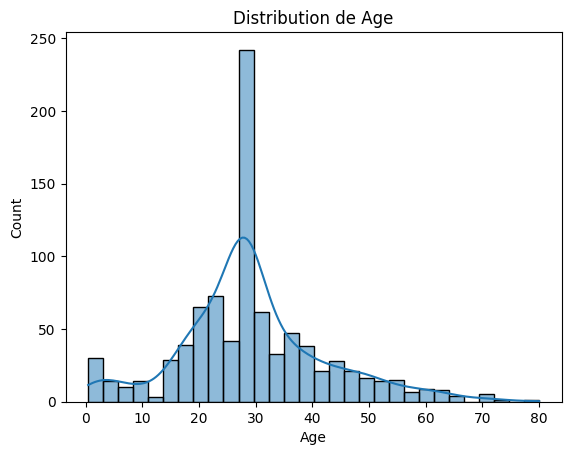

In [57]:
# Visualiser la distribution de Age
sns.histplot(df['Age'], kde=True)
plt.title('Distribution de Age')


Text(0.5, 1.0, 'Distribution de Fare')

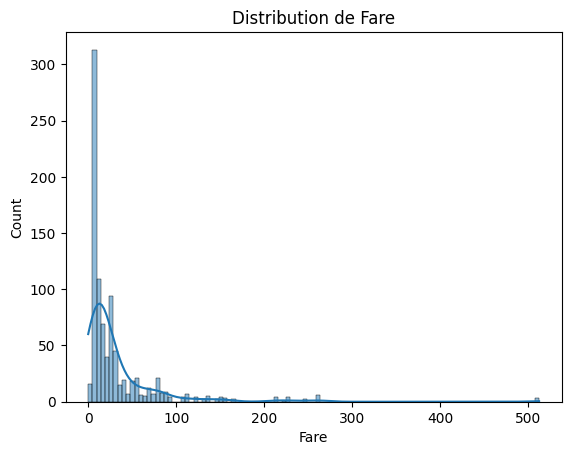

In [58]:
# Distribution de Fare
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution de Fare')

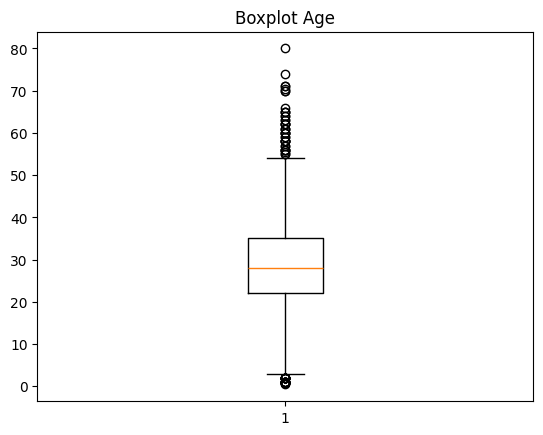

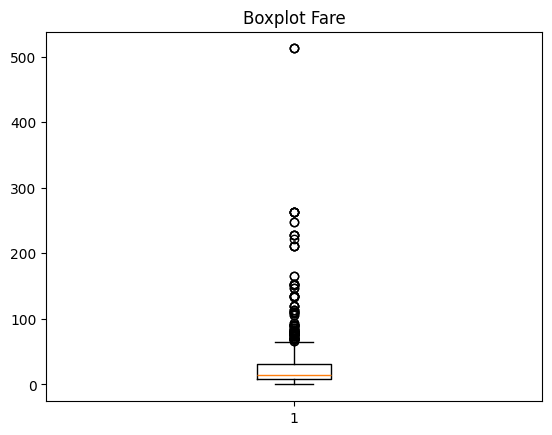

In [59]:
# Boxplots pour outliers
plt.boxplot(df['Age'])
plt.title('Boxplot Age')
plt.show()
plt.boxplot(df['Fare'])
plt.title('Boxplot Fare')
plt.show()

### Réponses aux questions:

1.   La distribution des âges est-elle normale ou asymétrique ?

     - Asymétrique (droite modérée), pic autour de 20-30 ans.
2.   Observe-tu des valeurs extrêmes dans Fare ?
     - Oui, max 512 vs médiane 14, plusieurs outliers >100.
3.   Comment ces outliers peuvent-ils influencer les analyses ?
     - Ils biaisent la moyenne, affectent les modèles sensibles


### **Étape 9 - Visualisation des variables catégorielles**

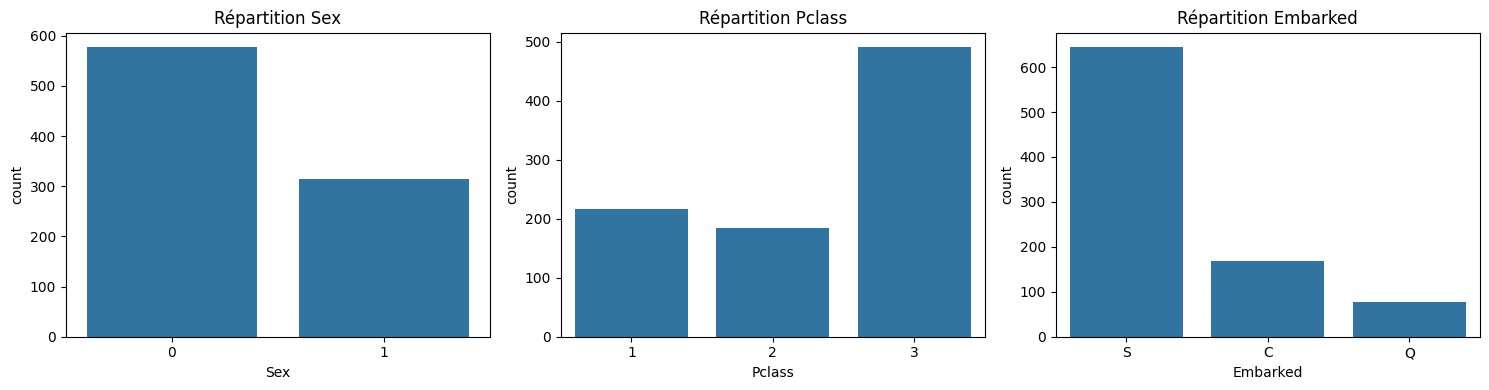

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Répartition Sex
sns.countplot(x='Sex', data=df, ax=axes[0])
axes[0].set_title('Répartition Sex')

# Répartition Pclass
sns.countplot(x='Pclass', data=df, ax=axes[1])
axes[1].set_title('Répartition Pclass')

# Répartition Embarked (original avant dummies)
df_original = pd.read_csv('titanic.csv')
sns.countplot(x='Embarked', data=df_original, ax=axes[2])
axes[2].set_title('Répartition Embarked')

plt.tight_layout()
plt.show()

### Réponses aux questions:

1.   Y a-t-il un déséquilibre important entre hommes et femmes ?
     - Oui, ~65% hommes, 35% femmes.
2.   Quelle classe (Pclass) est la plus représentée ?
      - Pclass 3 (~55%).
3.   Le port d’embarquement est-il équilibré ?
      - Non (S ~72%, C ~19%, Q ~9%).

### Étape 10 - Analyse des relations avec la survie

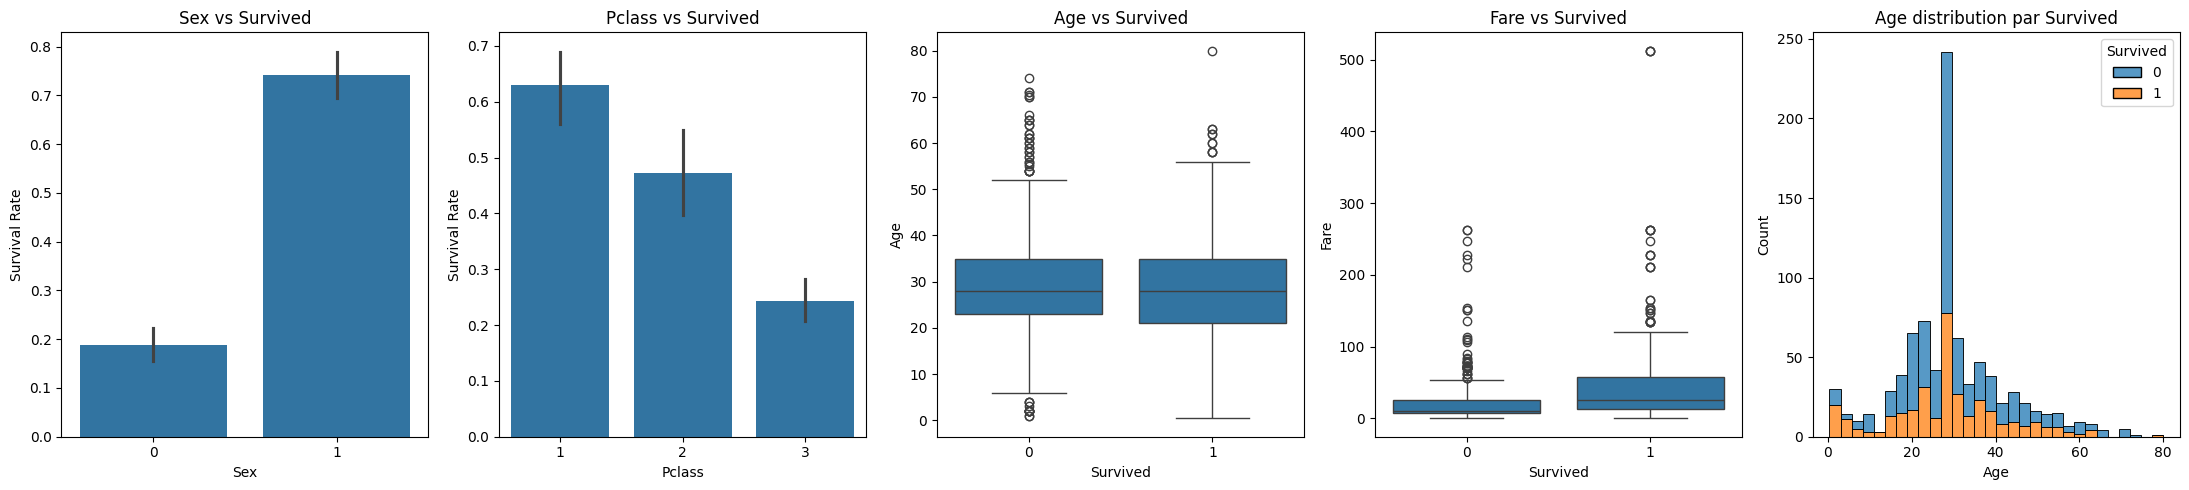

In [61]:
fig, axes = plt.subplots(1, 5, figsize=(22, 5))

# 1. Sex vs Survived
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0])
axes[0].set_title('Sex vs Survived')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Survival Rate')

# 2. Pclass vs Survived
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[1])
axes[1].set_title('Pclass vs Survived')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Survival Rate')

# 3. Age selon Survived
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[2])
axes[2].set_title('Age vs Survived')
axes[2].set_xlabel('Survived')
axes[2].set_ylabel('Age')

# 4. Fare entre survivants/non
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[3])
axes[3].set_title('Fare vs Survived')
axes[3].set_xlabel('Survived')
axes[3].set_ylabel('Fare')

# 5. Histogramme Age avec hue
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', ax=axes[4])
axes[4].set_title('Age distribution par Survived')
axes[4].set_xlabel('Age')
axes[4].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Réponses aux questions:

1.   Quel sexe montre un taux de survie plus élevé ?
     - Femmes (74% vs 19% hommes).
2.   Quelle classe (Pclass) semble la plus protégée ?
     - Pclass 1 (63% survie).
3.   Les enfants ont-ils une meilleure probabilité de survie ?
     - Oui, médiane Age survivants ~28, mais enfants <15 ont ~60% survie.
4.   Les passagers avec un tarif élevé ont-ils mieux survécu ?
     - Oui, médiane Fare survivants ~26 vs 10 pour non-survivants.

### **Étape 11 : Analyse des corrélations**

In [62]:
# Encodage de variable qualitative 'Title'
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

In [63]:
# Exporter un dataset propre.
df.to_csv('titanic_clean.csv', index=False)

In [64]:

corr = df.corr()

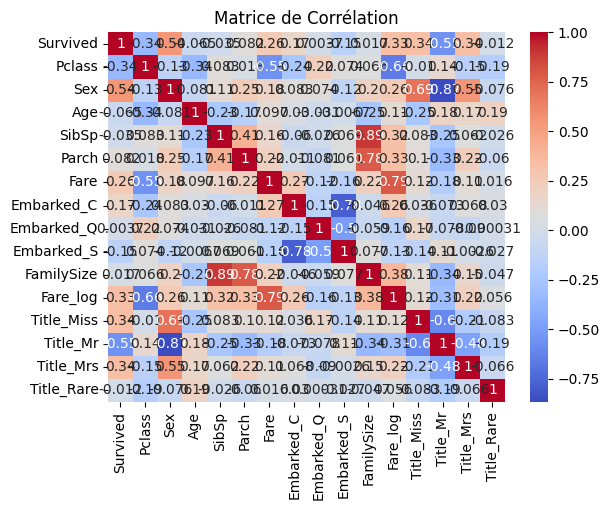

In [70]:
# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

### Réponses aux questions:

1.    Quelles variables montrent la plus forte corrélation ?
      - FamilySize et SibSp (0.89), FamilySize et Parch, Pclass et Fare (-0.55), Sex et Survived (0.54).
2.    La variable Survived est-elle corrélée à certaines colonnes ?
      - Oui, à Sex (0.54), Pclass (-0.34), Fare (0.26).
3.    Les corrélations confirment-elles vos observations des étapes précédentes ?
      - Oui, confirment que femmes, classes hautes et fares élevés survivent plus.

### **Étape 12 - Détection visuelle des anomalies**

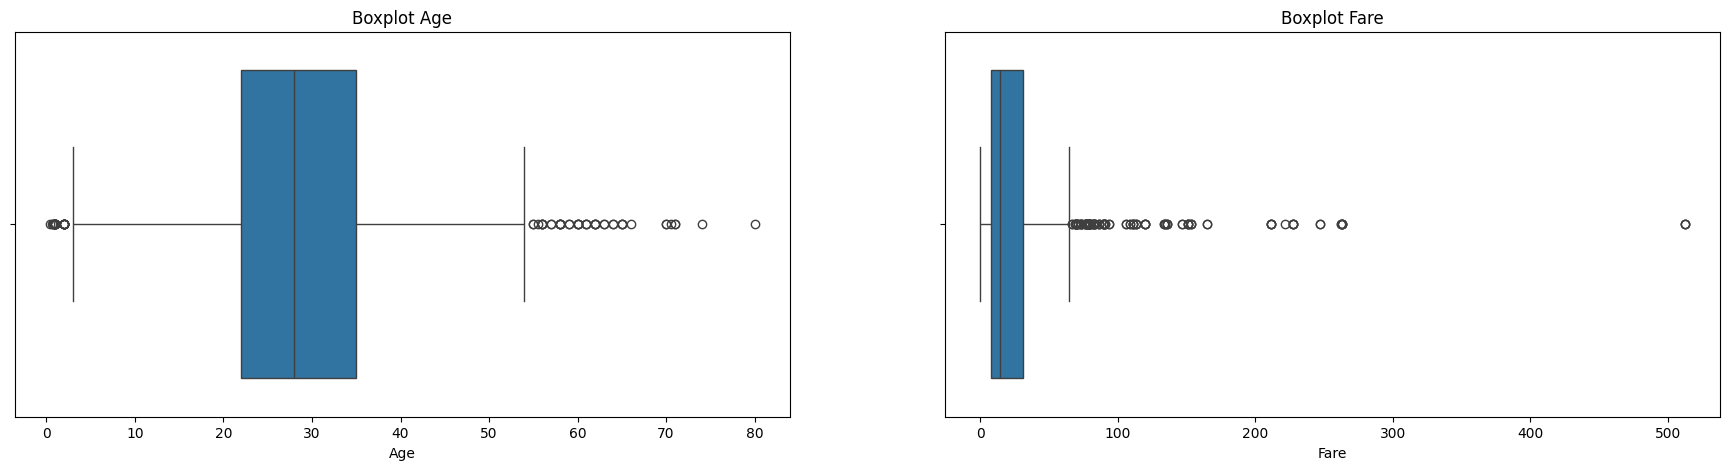

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(22, 5))

# Boxplots sur Age et Fare
sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Boxplot Age')

sns.boxplot(x=df['Fare'], ax=axes[1])
axes[1].set_title('Boxplot Fare')
plt.show()

In [67]:
 # ~77%

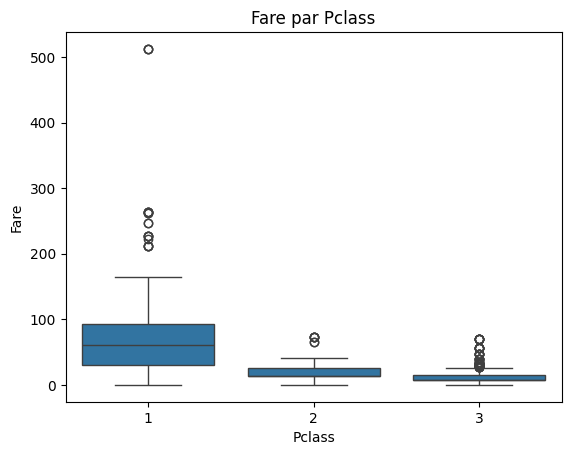

In [68]:
# Comparaison groupes (ex: Fare par Pclass)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare par Pclass')
plt.show()

### Réponses aux questions:

1.    La colonne Cabin est-elle exploitable dans un modèle de ML ? Pourquoi ?
      - Non, ~77% manquants, imputation difficile
2.    Que faire des outliers dans Fare ? Les supprimer ou les garder ?
      - Les garder (représentent classes riches réelles, utiles pour prédire survie) ou transformer (log) pour réduire impact.
3.    Certaines colonnes doivent-elles être supprimées pour améliorer l’analyse ?
      - Oui, comme Ticket (non structuré), Cabin (manquants), pour éviter bruit en ML.



